# Pay-as-you-drive vehicle insurance premium prediction 
## Capstone Project

In [1]:
import os
import pandas as pd
import math
import random
import numpy as np
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.metrics import precision_score, recall_score, f1_score

In [2]:
data=pd.read_csv('../data/capstone.csv')

In [3]:
data

,pol_number,pol_eff_dt,gender,agecat,date_of_birth,credit_score,area,traffic_index,mileage,veh_age,veh_body,veh_value,claim_office,numclaims,claimcst0,anuual_premium
0,43124327,12/30/2020,F,4.0,7/12/1968,381.0,D,133.6,16815,2,HBACK,1.331,NaN,0,0.0,2037
1,21919609,12/30/2020,F,2.0,11/5/1982,549.0,D,163.6,10117,1,UTE,3.740,NaN,0,0.0,2080
2,72577057,12/30/2020,M,2.0,11/26/1983,649.0,B,117.5,14107,4,COUPE,0.880,NaN,0,0.0,1727
3,92175225,12/30/2020,M,4.0,11/2/1960,743.0,B,100.7,6127,3,SEDAN,1.045,NaN,0,0.0,1244
4,66223239,12/30/2020,F,4.0,1/4/1968,817.0,C,115.5,19237,4,HBACK,0.473,NaN,0,0.0,2014
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
60386,73248694,1/2/2020,F,5.0,5/10/1956,809.0,C,145.5,13110,4,HBACK,0.891,NaN,0,0.0,1793
60387,71411764,1/2/2020,M,4.0,3/22/1961,681.0,D,86.3,11115,1,HBACK,1.881,NaN,0,0.0,1568
60388,89353155,1/2/2020,M,4.0,9/29/1965,773.0,F,110.0,6982,1,STNWG,5.170,NaN,0,0.0,2037
60389,40916605,1/2/2020,M,3.0,8/1/1978,714.0,B,108.3,16672,1,HBACK,1.903,NaN,0,0.0,1835


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 60391 entries, 0 to 60390
Data columns (total 16 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   pol_number      60391 non-null  int64  
 1   pol_eff_dt      60391 non-null  object 
 2   gender          60391 non-null  object 
 3   agecat          60391 non-null  float64
 4   date_of_birth   60391 non-null  object 
 5   credit_score    60391 non-null  float64
 6   area            60391 non-null  object 
 7   traffic_index   60391 non-null  float64
 8   mileage         60391 non-null  int64  
 9   veh_age         60391 non-null  int64  
 10  veh_body        60391 non-null  object 
 11  veh_value       60391 non-null  float64
 12  claim_office    10030 non-null  object 
 13  numclaims       60391 non-null  int64  
 14  claimcst0       60391 non-null  float64
 15  anuual_premium  60391 non-null  int64  
dtypes: float64(5), int64(5), object(6)
memory usage: 7.4+ MB


In [5]:
data_num = data.select_dtypes(include = ['float64', 'int64'])
data_num_corr = data_num.corr()['anuual_premium'][:-1] # -1 means that the latest row is SalePrice
abs(data_num_corr).sort_values(ascending=False)

mileage          0.686857
veh_value        0.588899
traffic_index    0.318862
veh_age          0.230970
numclaims        0.175086
claimcst0        0.152068
credit_score     0.094014
agecat           0.041863
pol_number       0.002097
Name: anuual_premium, dtype: float64

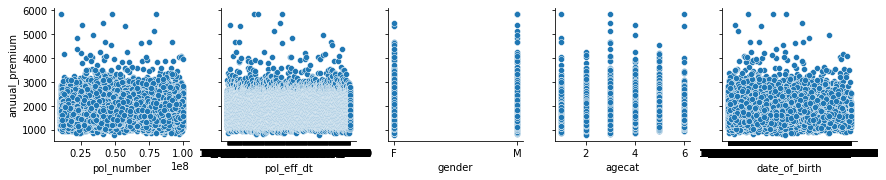

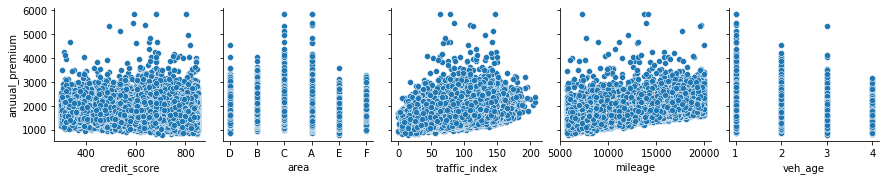

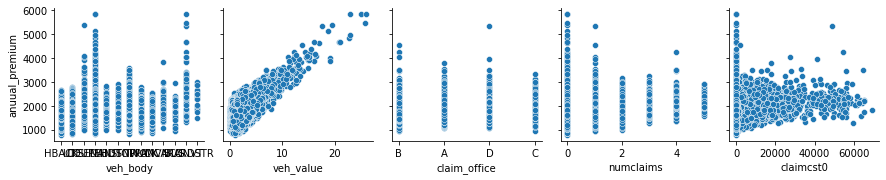

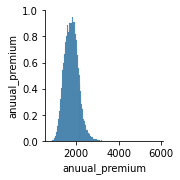

In [6]:
for i in range(0, len(data.columns), 5):
    sns.pairplot(data,
                x_vars=data.columns[i:i+5],
                y_vars=['anuual_premium'])

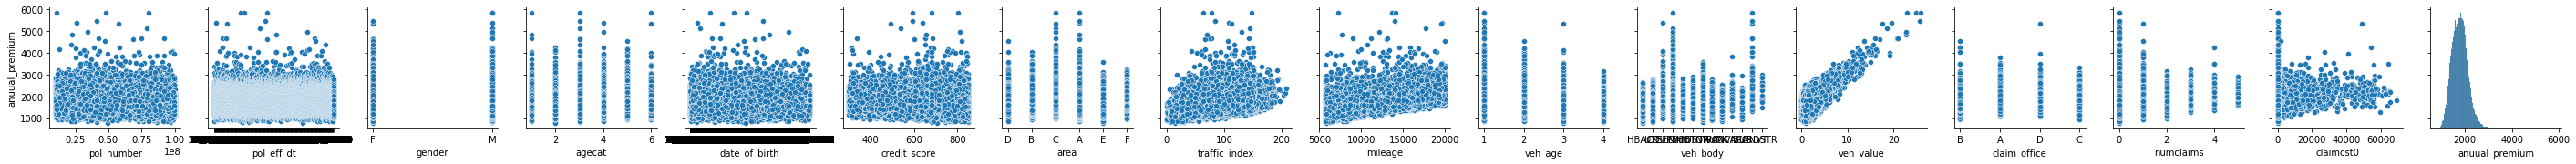

In [7]:
sns.pairplot(data,x_vars=data.columns,y_vars=['anuual_premium'])

In [8]:
data.corr()

<ipython-input-8-c44ded798807>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  data.corr()


,pol_number,agecat,credit_score,traffic_index,mileage,veh_age,veh_value,numclaims,claimcst0,anuual_premium
pol_number,1.000000,0.006614,0.002931,-0.002847,-0.000483,-0.003028,0.005631,-0.003878,0.000892,0.002097
agecat,0.006614,1.000000,0.292322,-0.014162,0.002071,0.016028,-0.054288,-0.109220,-0.038193,0.041863
credit_score,0.002931,0.292322,1.000000,-0.000210,-0.005523,0.002115,-0.008964,-0.295021,-0.287737,-0.094014
traffic_index,-0.002847,-0.014162,-0.000210,1.000000,0.003268,0.001757,-0.040078,0.081036,-0.001128,0.318862
mileage,-0.000483,0.002071,-0.005523,0.003268,1.000000,0.004106,-0.008474,0.004788,0.005282,0.686857
veh_age,-0.003028,0.016028,0.002115,0.001757,0.004106,1.000000,-0.545295,0.011173,-0.129982,-0.230970
veh_value,0.005631,-0.054288,-0.008964,-0.040078,-0.008474,-0.545295,1.000000,0.018158,0.130748,0.588899
numclaims,-0.003878,-0.109220,-0.295021,0.081036,0.004788,0.011173,0.018158,1.000000,0.478921,0.175086
claimcst0,0.000892,-0.038193,-0.287737,-0.001128,0.005282,-0.129982,0.130748,0.478921,1.000000,0.152068
anuual_premium,0.002097,0.041863,-0.094014,0.318862,0.686857,-0.230970,0.588899,0.175086,0.152068,1.000000


<ipython-input-9-9844a6497a77>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(data.corr(),annot=True,lw=1)


<Axes: >

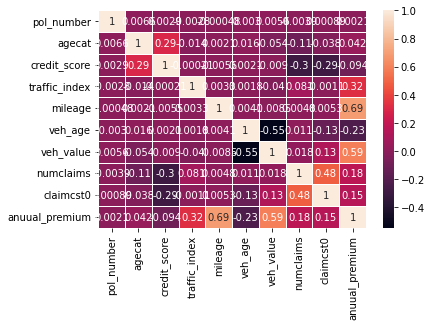

In [9]:
sns.heatmap(data.corr(),annot=True,lw=1)

In [10]:
dummy_data= data[['pol_number','gender','agecat','credit_score','area','traffic_index','mileage','veh_age','veh_body','veh_value','numclaims','claimcst0']]
dummy_data = pd.get_dummies(data=dummy_data)
dummy_data

,pol_number,agecat,credit_score,traffic_index,mileage,veh_age,veh_value,numclaims,claimcst0,gender_F,...,veh_body_HBACK,veh_body_HDTOP,veh_body_MCARA,veh_body_MIBUS,veh_body_PANVN,veh_body_RDSTR,veh_body_SEDAN,veh_body_STNWG,veh_body_TRUCK,veh_body_UTE
0,43124327,4.0,381.0,133.6,16815,2,1.331,0,0.0,1,...,1,0,0,0,0,0,0,0,0,0
1,21919609,2.0,549.0,163.6,10117,1,3.740,0,0.0,1,...,0,0,0,0,0,0,0,0,0,1
2,72577057,2.0,649.0,117.5,14107,4,0.880,0,0.0,0,...,0,0,0,0,0,0,0,0,0,0
3,92175225,4.0,743.0,100.7,6127,3,1.045,0,0.0,0,...,0,0,0,0,0,0,1,0,0,0
4,66223239,4.0,817.0,115.5,19237,4,0.473,0,0.0,1,...,1,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
60386,73248694,5.0,809.0,145.5,13110,4,0.891,0,0.0,1,...,1,0,0,0,0,0,0,0,0,0
60387,71411764,4.0,681.0,86.3,11115,1,1.881,0,0.0,0,...,1,0,0,0,0,0,0,0,0,0
60388,89353155,4.0,773.0,110.0,6982,1,5.170,0,0.0,0,...,0,0,0,0,0,0,0,1,0,0
60389,40916605,3.0,714.0,108.3,16672,1,1.903,0,0.0,0,...,1,0,0,0,0,0,0,0,0,0


In [11]:
X = dummy_data
Y = data['anuual_premium']
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.3, random_state=101)
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(42273, 30)
(18118, 30)
(42273,)
(18118,)


In [12]:
model = LinearRegression()
model.fit(X_train,y_train)

LinearRegression()

In [13]:
print(model.intercept_)

242.26015158265886


In [14]:
coeff_parameter = pd.DataFrame(model.coef_,X.columns,columns=['Coefficient'])
coeff_parameter

,Coefficient
pol_number,-2.815847e-09
agecat,2.928967e+01
credit_score,-2.150900e-01
traffic_index,3.525331e+00
mileage,5.717820e-02
veh_age,4.389101e+01
veh_value,1.781575e+02
numclaims,7.391736e+01
claimcst0,2.977157e-05
gender_F,-1.579027e-01


In [15]:
predictions = model.predict(X_test)
predictions

array([1626.32425396, 1606.42465813, 2222.39624642, ..., 2068.7978365 ,
       1578.25703085, 1896.62789149])

<Axes: xlabel='anuual_premium'>

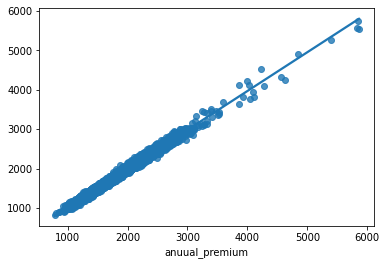

In [16]:
sns.regplot(x=y_test,y=predictions)

In [17]:
import statsmodels.api as sm
X_train_Sm= sm.add_constant(X_train)
X_train_Sm= sm.add_constant(X_train)
ls=sm.OLS(y_train,X_train_Sm).fit()
print(ls.summary())

                            OLS Regression Results                            
Dep. Variable:         anuual_premium   R-squared:                       0.987
Model:                            OLS   Adj. R-squared:                  0.987
Method:                 Least Squares   F-statistic:                 1.185e+05
Date:                Wed, 15 Mar 2023   Prob (F-statistic):               0.00
Time:                        08:49:26   Log-Likelihood:            -2.1500e+05
No. Observations:               42273   AIC:                         4.301e+05
Df Residuals:                   42245   BIC:                         4.303e+05
Df Model:                          27                                         
Covariance Type:            nonrobust                                         
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
const            138.9433      1.300    106.

In [18]:
r2 = r2_score(y_test, predictions)
r2

0.9870681588844568

In [19]:
rf = RandomForestRegressor(n_estimators=200, random_state=42)
rf.fit(X_train, y_train)
y_pred = rf.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
print(mse)
print(r2)

3425.9174771525554
0.971396117413449


In [20]:
from sklearn.tree import DecisionTreeRegressor

In [21]:
model = DecisionTreeRegressor(random_state=42)
model.fit(X_train, y_train)
model.fit(X_train, y_train)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
print('Mean Squared Error:', mse)
print('R-squared Score:', r2)

Mean Squared Error: 3425.9174771525554
R-squared Score: 0.971396117413449


In [22]:
from sklearn.ensemble import GradientBoostingRegressor

In [23]:
model = GradientBoostingRegressor( n_estimators=100, max_depth=3, learning_rate=0.21, random_state=42)
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print('Mean Squared Error:', mse)
print('R-squared Score:', r2)

Mean Squared Error: 2382.718720288381
R-squared Score: 0.9801060571463173
